# Exploratory Data Analysis for first look at Crypto Data

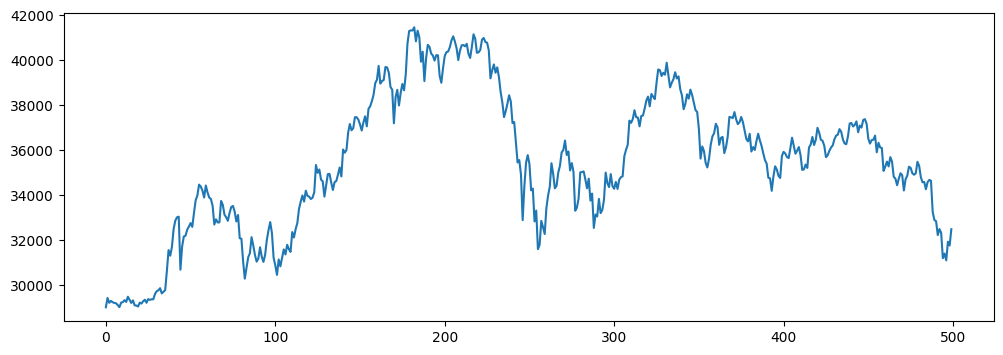

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_parquet("/home/nina/crypto-ml-trading/data/BTCUSDT_1h.parquet")
df["close"].plot(figsize=(12,4))
plt.show()

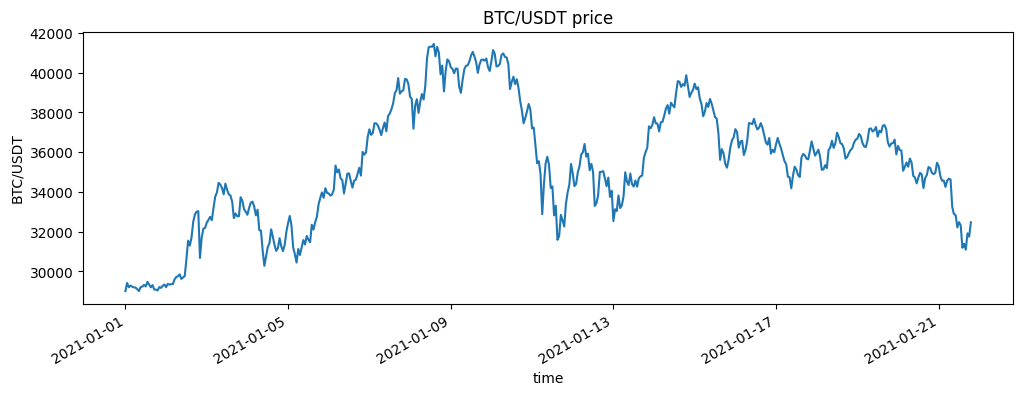

In [2]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df["timestamp"], df["close"])

date_format = mdates.DateFormatter('%Y-%m-%d') #format: YYYY-MM-DD
ax.xaxis.set_major_formatter(date_format)

fig.autofmt_xdate() # rotate date to prevent overlap

ax.set_title("BTC/USDT price")
ax.set_xlabel("time")
ax.set_ylabel("BTC/USDT")

plt.show()

In [3]:
df.describe()

,timestamp,open,high,low,close,volume
count,500,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2021-01-11 09:30:00,35418.359040,35800.530520,34973.892360,35425.620600,4808.455412
min,2021-01-01 00:00:00,28923.630000,29031.340000,28130.000000,28995.130000,971.123385
25%,2021-01-06 04:45:00,33360.062500,33870.567500,32810.312500,33360.067500,2912.090694
50%,2021-01-11 09:30:00,35476.320000,35922.410000,35017.480000,35476.315000,3952.838486
75%,2021-01-16 14:15:00,37450.995000,37795.125000,37020.992500,37450.995000,5733.328005
max,2021-01-21 19:00:00,41454.130000,41950.000000,40970.220000,41454.130000,23220.782629
std,NaN,3102.064317,3107.324159,3084.481082,3091.192801,3037.402515


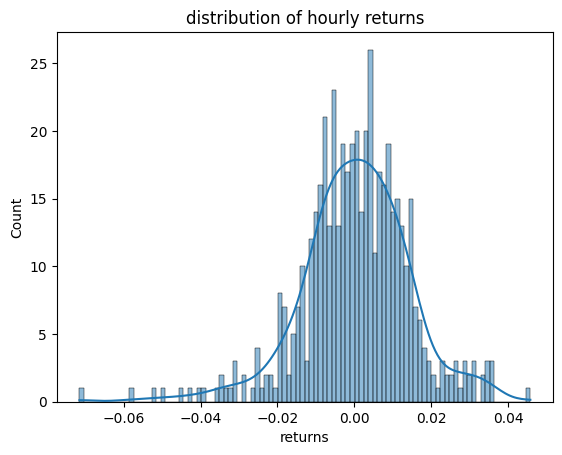

In [ ]:
# show hight/low volatilityy
df["returns"] = df["close"].pct_change()
sns.histplot(df["returns"].dropna(), bins=100, kde=True)
plt.title("distribution of hourly returns")
plt.show()


- **hourly returns** = Price change from one hour to the next, here around -8% to +4%, most between -2% and +2%
- might help for risk management and if data is stationary
- "Fat tails" occur when the probability of large price changes (up or down) is significantly higher than predicted by a normal distribution. Instead of a neat "bell-shaped" curve, we see distributions with "thick tails," like Lévy, Pareto, or Cauchy distributions. (https://www.tradingview.com/chart/NVDA/SqIxurEq-Fat-Tails-Why-Mean-Reversion-is-a-Rarity-in-Financial-Markets/)

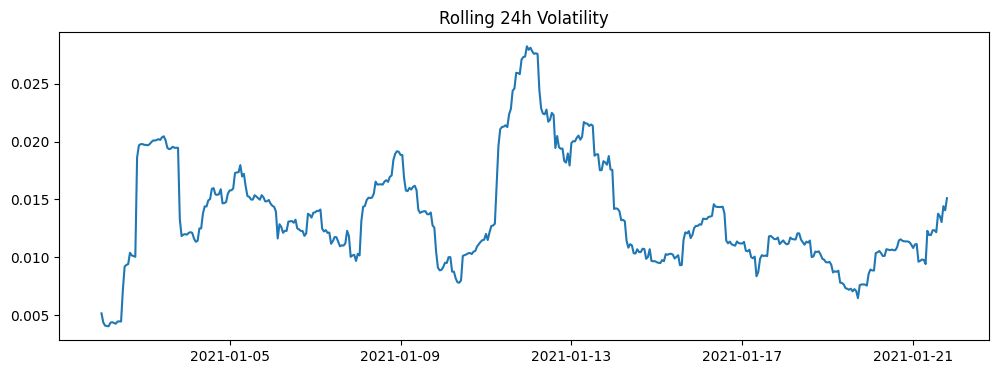

In [15]:
df["rolling_vol"] = df["returns"].rolling(window=24).std()  # 24h rolling
plt.figure(figsize=(12,4))
plt.plot(df["timestamp"], df["rolling_vol"])
plt.title("Rolling 24h Volatility")
plt.show()


- **rolling 24h volatility**  = standard deviation / mean variation of return, rolling 24h calculates in 24h window
- high volatility -> unsure market, high risk, strong trends or crashes
- high volatility on 12th January (crash around that time)
- might use volatility as feature for ML -> categorize in calm/turbulent etc

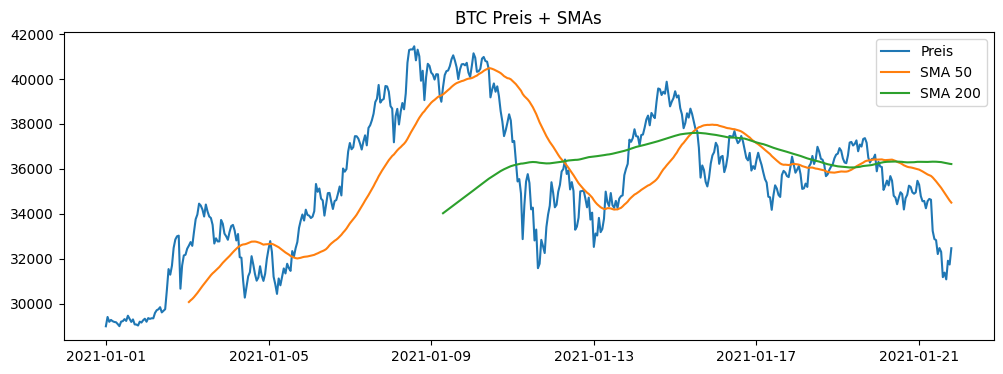

In [16]:
df["sma_50"] = df["close"].rolling(window=50).mean()
df["sma_200"] = df["close"].rolling(window=200).mean()

plt.figure(figsize=(12,4))
plt.plot(df["timestamp"], df["close"], label="Preis")
plt.plot(df["timestamp"], df["sma_50"], label="SMA 50")
plt.plot(df["timestamp"], df["sma_200"], label="SMA 200")
plt.legend()
plt.title("BTC Preis + SMAs")
plt.show()


- **SMA (Simple Moving Average)**
    - SMA 50 = short term
    - SMA 200 longterm
    - Crossovers are mportant
        - death cross shortly before 13th Januaray 2021
            - might becareful that "mini death cross / golden cross" isnt noticed and only a certain slope is needed to classify it as such

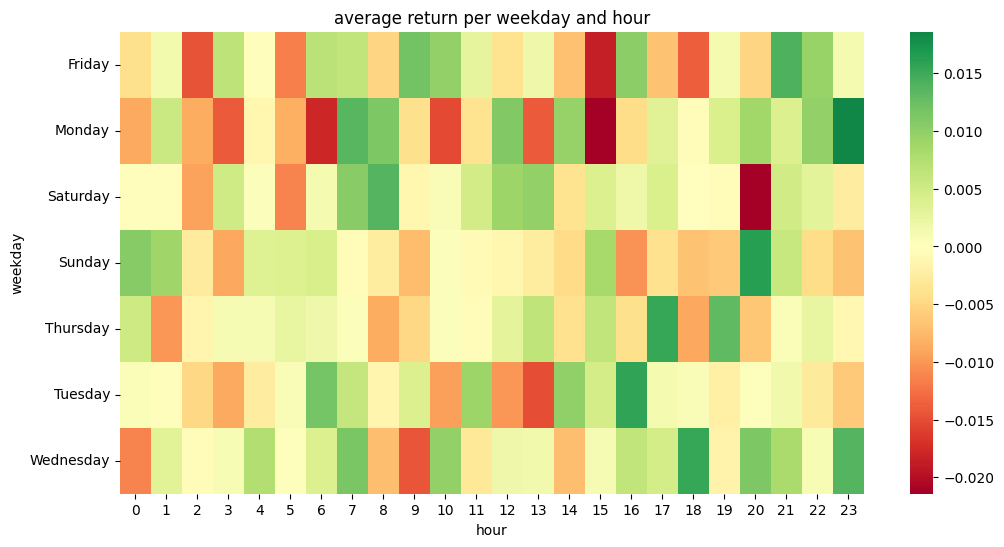

In [18]:
df["weekday"] = df["timestamp"].dt.day_name()
df["hour"] = df["timestamp"].dt.hour

pivot = df.pivot_table(values="returns", index="weekday", columns="hour", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="RdYlGn", center=0)
plt.title("average return per weekday and hour")
plt.show()


- **average Return** = mean of return
    - id 0 -> marked in random walk (no hourly gain or loss)
    - positive -> slightly bulish on average
    - negative -> bearish

    - why is there so much green if it is supposed to signal bulish?